In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
x=pd.read_csv("data_train.csv")
x.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,Laborers,1.0,2,2,WEDNESDAY,10,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Core staff,2.0,1,1,MONDAY,11,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Laborers,1.0,2,2,MONDAY,9,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Laborers,2.0,2,2,WEDNESDAY,17,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Core staff,1.0,2,2,THURSDAY,11,0,Religion,0.322738
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,1,Laborers,2.0,2,2,WEDNESDAY,16,0,Other,0.354225
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,1,Accountants,3.0,2,2,SUNDAY,16,0,Business Entity Type 3,0.724000
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,1,Managers,2.0,3,3,MONDAY,16,0,Other,0.714279
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,1,NaN,2.0,2,2,WEDNESDAY,14,0,XNA,0.205747
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,1,Laborers,1.0,2,2,THURSDAY,8,0,Electricity,0.746644


In [2]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [3]:
x.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
R

In [4]:
x = x.dropna(subset=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','EXT_SOURCE_2'])


In [5]:
occupation_mode = x['OCCUPATION_TYPE'].mode()[0]
x['OCCUPATION_TYPE'].fillna(occupation_mode, inplace=True)
print("Mode of OCCUPATION_TYPE:", occupation_mode)

Mode of OCCUPATION_TYPE: Laborers


In [6]:
x.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_CITY_N

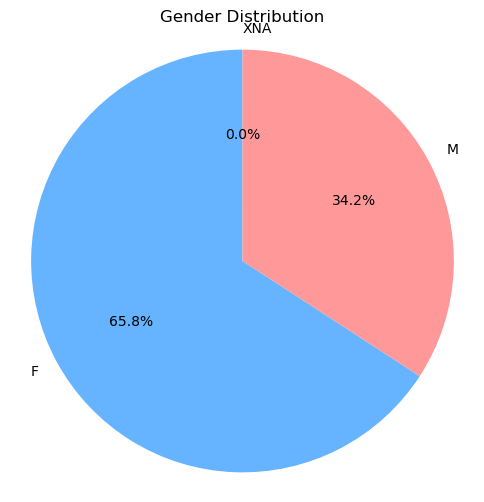

In [7]:
gender_counts = x['CODE_GENDER'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

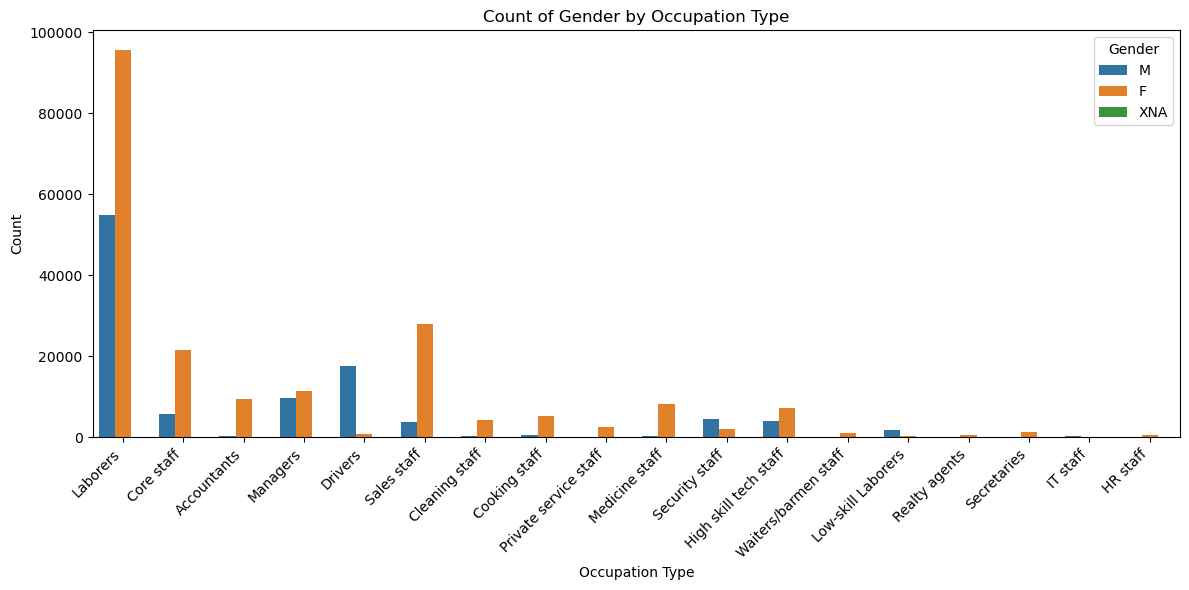

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=x, x='OCCUPATION_TYPE', hue='CODE_GENDER')
plt.title('Count of Gender by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


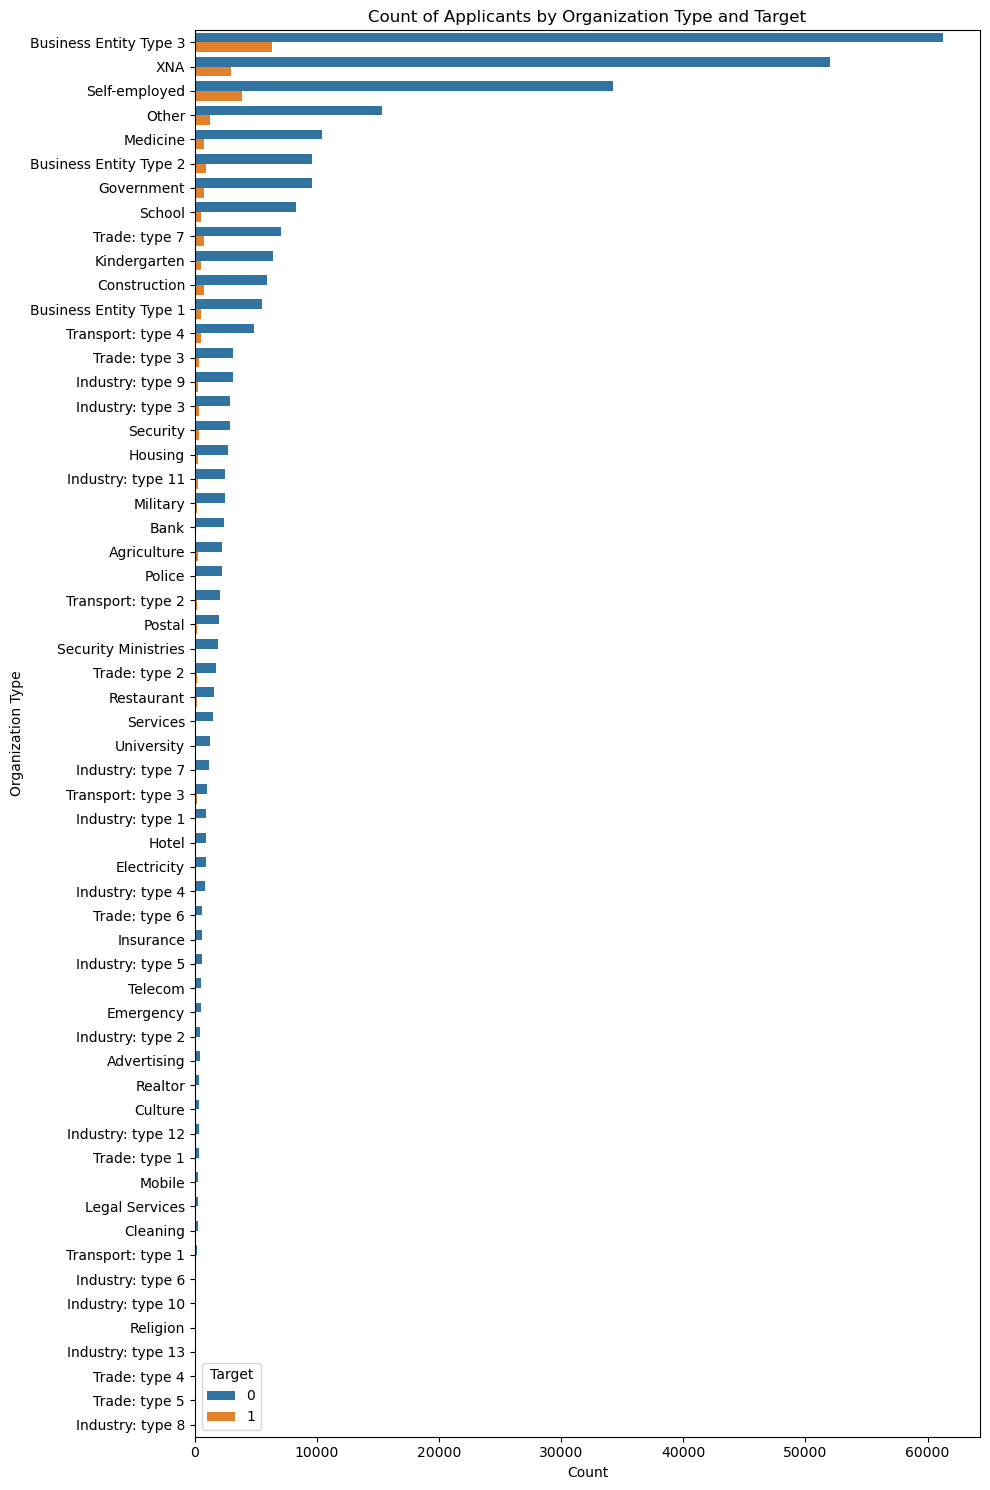

In [9]:
plt.figure(figsize=(10, 15))
sns.countplot(data=x, y='ORGANIZATION_TYPE', hue='TARGET', order=x['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Count of Applicants by Organization Type and Target')
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

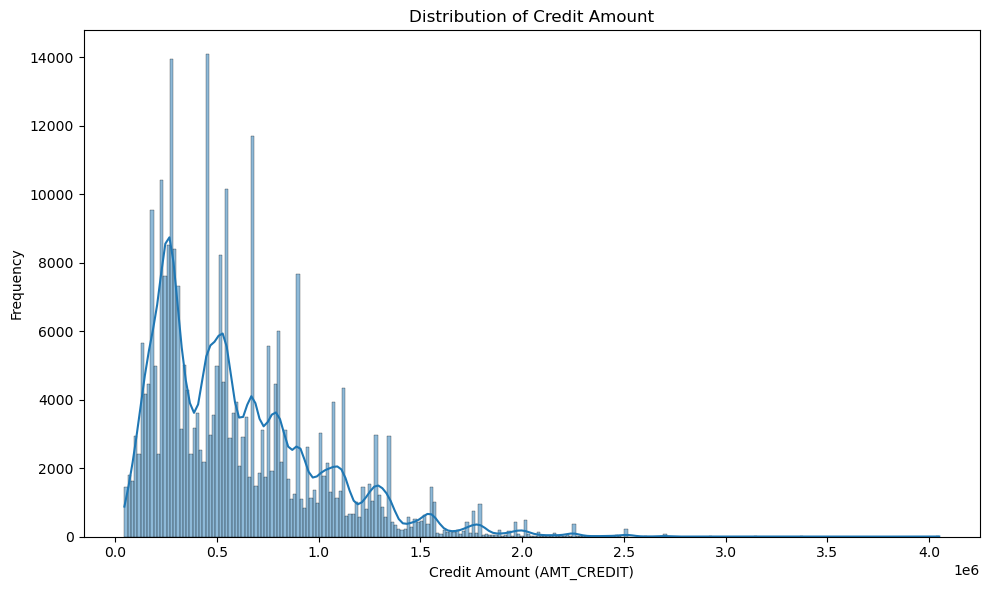

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=x, x='AMT_CREDIT', kde=True)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount (AMT_CREDIT)')
plt.ylabel('Frequency') #The y-axis in a histogram represents the frequency or count of data points within each bin, which is inherently a numerical value
plt.tight_layout()
plt.show()

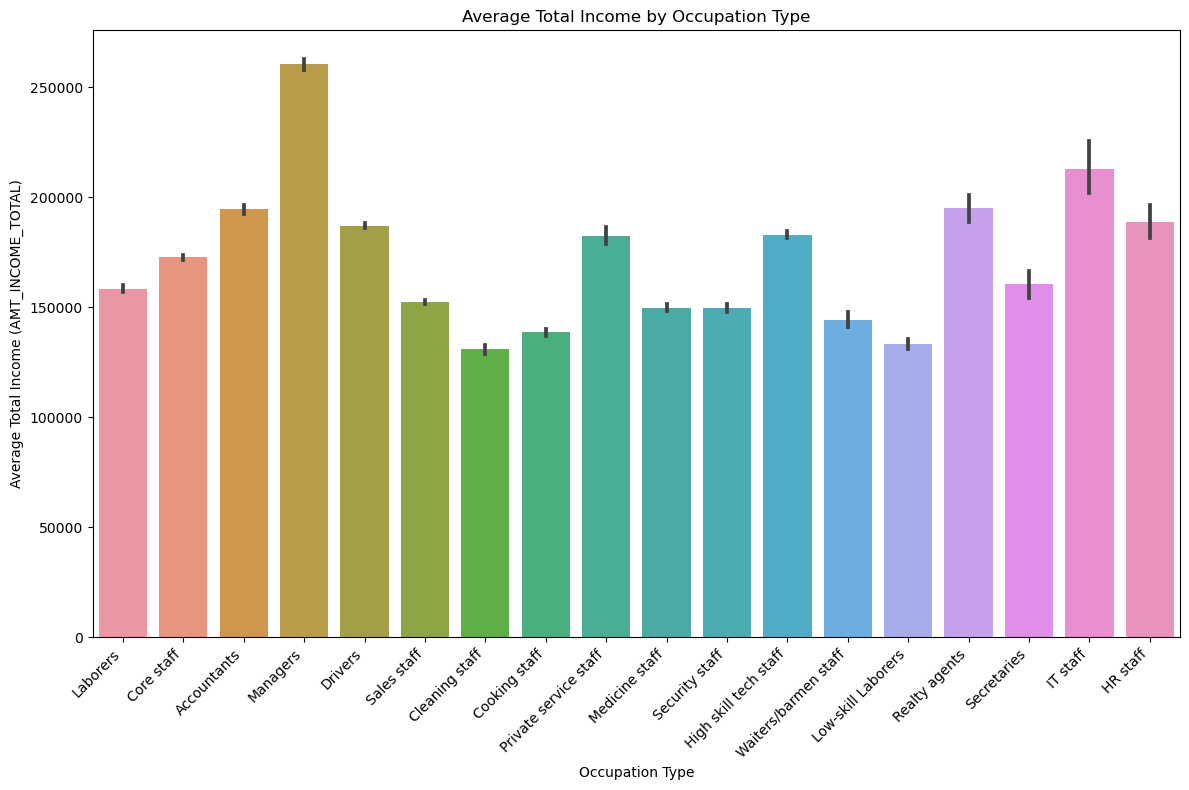

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=x, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', estimator='mean')
plt.title('Average Total Income by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Average Total Income (AMT_INCOME_TOTAL)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

it allows you to quickly compare the typical income levels across different occupations in this dataset as we see the managers has the highest income

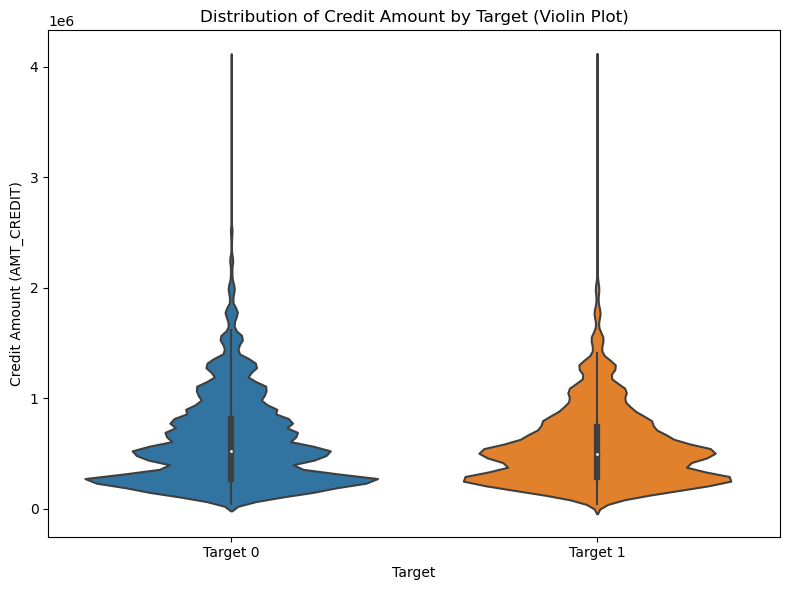

In [12]:
# A violin plot is a good alternative to a box plot for comparing the distribution of a numerical variable across categories.
plt.figure(figsize=(8, 6))
sns.violinplot(data=x, x='TARGET', y='AMT_CREDIT')
plt.title('Distribution of Credit Amount by Target (Violin Plot)')
plt.xlabel('Target')
plt.ylabel('Credit Amount (AMT_CREDIT)')
plt.xticks([0, 1], ['Target 0', 'Target 1']) # Assuming TARGET is 0 or 1
plt.tight_layout()
plt.show()

This violin plot shows the distribution of AMT_CREDIT for each TARGET group (Target 0 and Target 1).

The width of the violin shape at any given credit amount indicates the density of data points at that value. A wider section means more people have that credit amount. The thicker bar in the center of each violin represents the interquartile range (IQR), and the white dot is the medianThis violin plot shows the distribution of AMT_CREDIT for each TARGET group (Target 0 and Target 1).

The width of the violin shape at any given credit amount indicates the density of data points at that value. A wider section means more people have that credit amount. The thicker bar in the center of each violin represents the interquartile range (IQR), and the white dot is the median

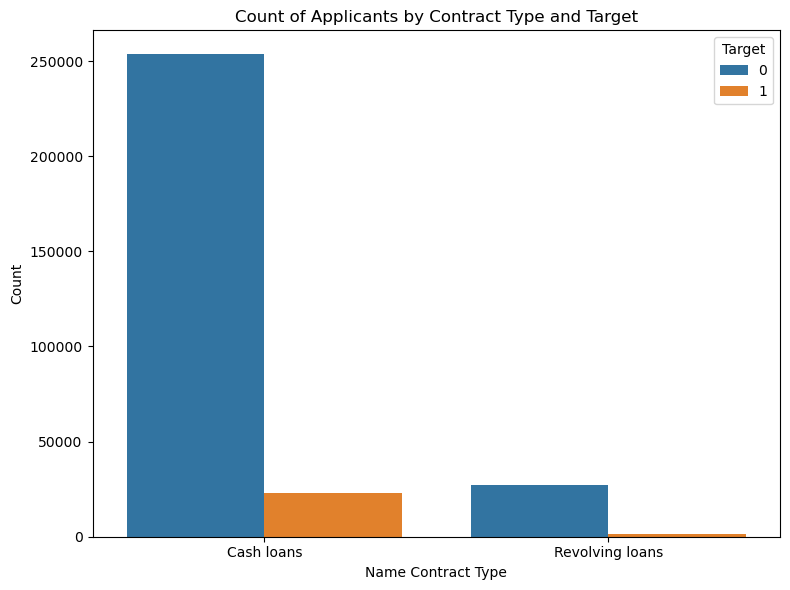

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=x, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title('Count of Applicants by Contract Type and Target')
plt.xlabel('Name Contract Type')
plt.ylabel('Count')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

This chart helps us see the number of individuals in each target group for both 'Cash loans' and 'Revolving loans'

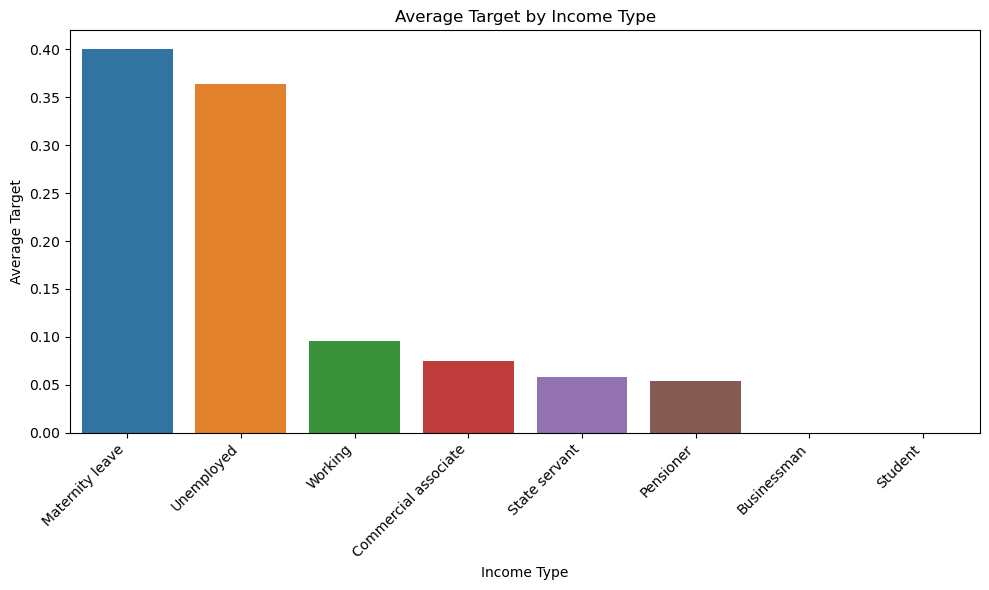

In [14]:
income_target_mean = x.groupby('NAME_INCOME_TYPE')['TARGET'].mean().reset_index()
income_target_mean = income_target_mean.sort_values(by='TARGET', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=income_target_mean, x='NAME_INCOME_TYPE', y='TARGET')
plt.title('Average Target by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Average Target')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

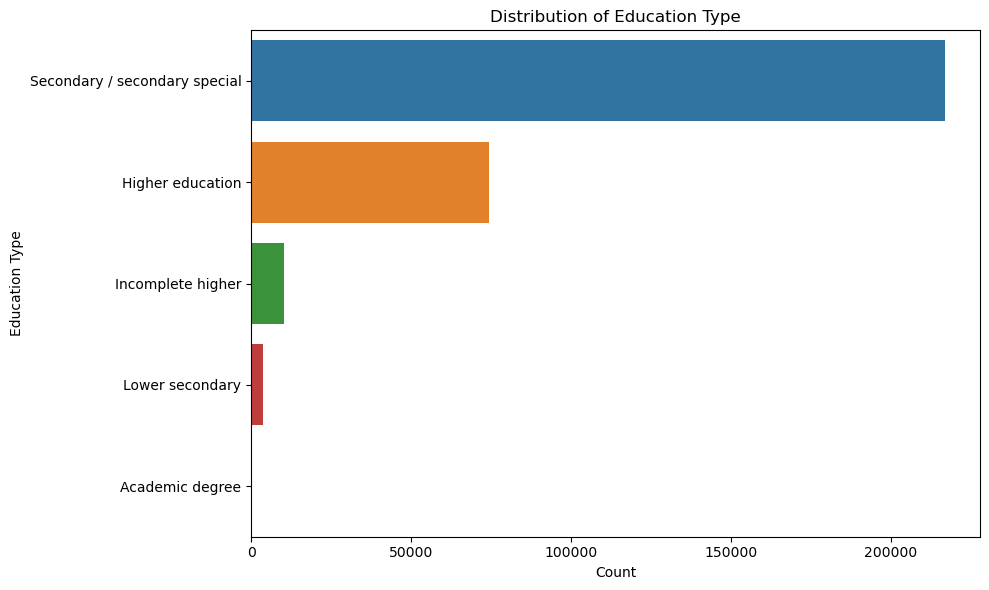

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=x, y='NAME_EDUCATION_TYPE', order=x['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Distribution of Education Type')
plt.xlabel('Count')
plt.ylabel('Education Type')
plt.tight_layout()
plt.show()

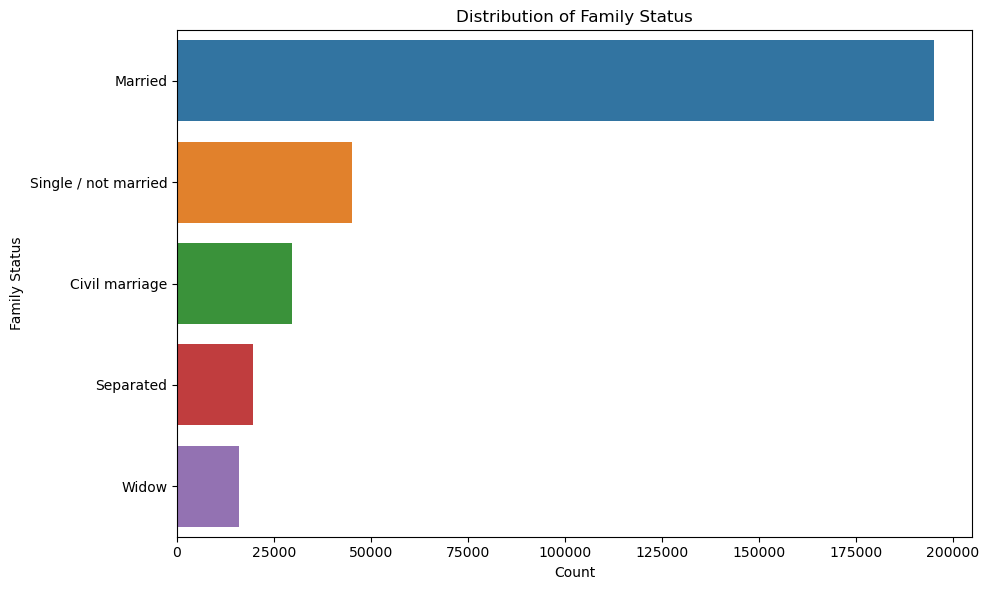

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=x, y='NAME_FAMILY_STATUS', order=x['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Distribution of Family Status')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()

the last three bar charts showing the distributions of Income Type, Education Type, and Family Status can help you understand the profile of your applicant base ** Identify your typical customer segments: This helps in targeted marketing and product development. **Inform risk assessment: Certain income types, education levels, or family statuses might be associated with higher or lower risk profiles. Optimize operational processes: Understanding the characteristics of your applicant pool can help streamline application processing and customer service

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = x[features]
y = x['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9052200949108166
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56212
           1       0.15      0.04      0.06      4898

    accuracy                           0.91     61110
   macro avg       0.53      0.51      0.50     61110
weighted avg       0.86      0.91      0.88     61110



In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = x[features]
y = x['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8865161184748813
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56212
           1       0.12      0.07      0.08      4898

    accuracy                           0.89     61110
   macro avg       0.52      0.51      0.51     61110
weighted avg       0.86      0.89      0.87     61110



In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = x[features]
y = x['TARGET']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.9198494518082146
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56212
           1       0.00      0.00      0.00      4898

    accuracy                           0.92     61110
   macro avg       0.46      0.50      0.48     61110
weighted avg       0.85      0.92      0.88     61110



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import f1_score, accuracy_score
rf_acc = accuracy_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred_dt)
svm_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred_dt)
svm_f1 = f1_score(y_test, y_pred)
results = {
    'Random Forest': {'accuracy': rf_acc, 'f1': rf_f1},
    'Decision Tree': {'accuracy': dt_acc, 'f1': dt_f1},
    'SVM': {'accuracy': svm_acc, 'f1': svm_f1}
}

best_acc_model = max(results, key=lambda k: results[k]['accuracy'])
best_f1_model = max(results, key=lambda k: results[k]['f1'])

print(f"Best accuracy: {best_acc_model} ({results[best_acc_model]['accuracy']:.4f})")
print(f"Best F1 score: {best_f1_model} ({results[best_f1_model]['f1']:.4f})")

Best accuracy: Random Forest (0.9198)
Best F1 score: Decision Tree (0.0845)
